In [ ]:
# pip install rnacorex

In [1]:
import rnacorex

In [2]:
# Download the required engines.

rnacorex.download()

Downloading...
From (original): https://drive.google.com/uc?id=10FjHjMYshpla2mK4WkiCDrbTw5Bz3PEo
From (redirected): https://drive.google.com/uc?id=10FjHjMYshpla2mK4WkiCDrbTw5Bz3PEo&confirm=t&uuid=4ed8cdf1-5676-46ff-83ef-1e8ddf8ec7f0
To: c:\Users\aoviedomadr\AppData\Local\anaconda3\envs\rnacorex\lib\site-packages\rnacorex\engines\DIANA_targets.txt
100%|██████████| 1.23G/1.23G [01:56<00:00, 10.5MB/s]


✓ Saved DIANA_targets.txt


Downloading...
From (original): https://drive.google.com/uc?id=1pdsg5ZnvMdQiJV4y1nrsoHzbP_mPBKCY
From (redirected): https://drive.google.com/uc?id=1pdsg5ZnvMdQiJV4y1nrsoHzbP_mPBKCY&confirm=t&uuid=98523e50-8b6f-4129-a718-aee2599b7b65
To: c:\Users\aoviedomadr\AppData\Local\anaconda3\envs\rnacorex\lib\site-packages\rnacorex\engines\gencode.v47.basic.annotation.gtf
100%|██████████| 1.05G/1.05G [01:45<00:00, 9.97MB/s]


✓ Saved gencode.v47.basic.annotation.gtf


Downloading...
From (original): https://drive.google.com/uc?id=1rTr4gKPChCKiUFLTvYlDNLEItniEB21K
From (redirected): https://drive.google.com/uc?id=1rTr4gKPChCKiUFLTvYlDNLEItniEB21K&confirm=t&uuid=0221a785-ccc5-402a-b197-5813a68832da
To: c:\Users\aoviedomadr\AppData\Local\anaconda3\envs\rnacorex\lib\site-packages\rnacorex\engines\MTB_targets_25.csv
100%|██████████| 393M/393M [00:38<00:00, 10.2MB/s] 


✓ Saved MTB_targets_25.csv


Downloading...
From (original): https://drive.google.com/uc?id=1ShqnwHImQraRLpPXmC6Z-uzHBj8cu777
From (redirected): https://drive.google.com/uc?id=1ShqnwHImQraRLpPXmC6Z-uzHBj8cu777&confirm=t&uuid=e13a20b0-9684-4525-878e-165630589354
To: c:\Users\aoviedomadr\AppData\Local\anaconda3\envs\rnacorex\lib\site-packages\rnacorex\engines\TarBase_v9.tsv
100%|██████████| 960M/960M [01:30<00:00, 10.6MB/s] 


✓ Saved TarBase_v9.tsv


Downloading...
From (original): https://drive.google.com/uc?id=1-mNLLyV9oz5kBJ0Py3wZONuiGVbhhx7A
From (redirected): https://drive.google.com/uc?id=1-mNLLyV9oz5kBJ0Py3wZONuiGVbhhx7A&confirm=t&uuid=2f48f41c-6659-4951-9466-a9e0ec863233
To: c:\Users\aoviedomadr\AppData\Local\anaconda3\envs\rnacorex\lib\site-packages\rnacorex\engines\Targetscan_targets.txt
100%|██████████| 3.81G/3.81G [06:04<00:00, 10.4MB/s]

✓ Saved Targetscan_targets.txt


In [2]:
# Check if the engines are installed correctly.

rnacorex.check_engines()

✅ All required engines are present.


True

STARTING ENGINES...
LOADING ENGINE...


100%|██████████| 14337075/14337075 [00:03<00:00, 3980881.60it/s]


LOADING ENGINE...


100%|██████████| 25231980/25231980 [00:06<00:00, 4082949.99it/s]


LOADING ENGINE...


100%|██████████| 4671966/4671966 [00:01<00:00, 3548096.84it/s]


LOADING ENGINE...


100%|██████████| 1322865/1322865 [00:00<00:00, 3776744.18it/s]



MODEL INITIALIZED
MicroRNAs:  173
Genes:  756
Connections:  2810


Calculating mutual information: 100%|██████████| 2810/2810 [02:19<00:00, 20.08it/s]


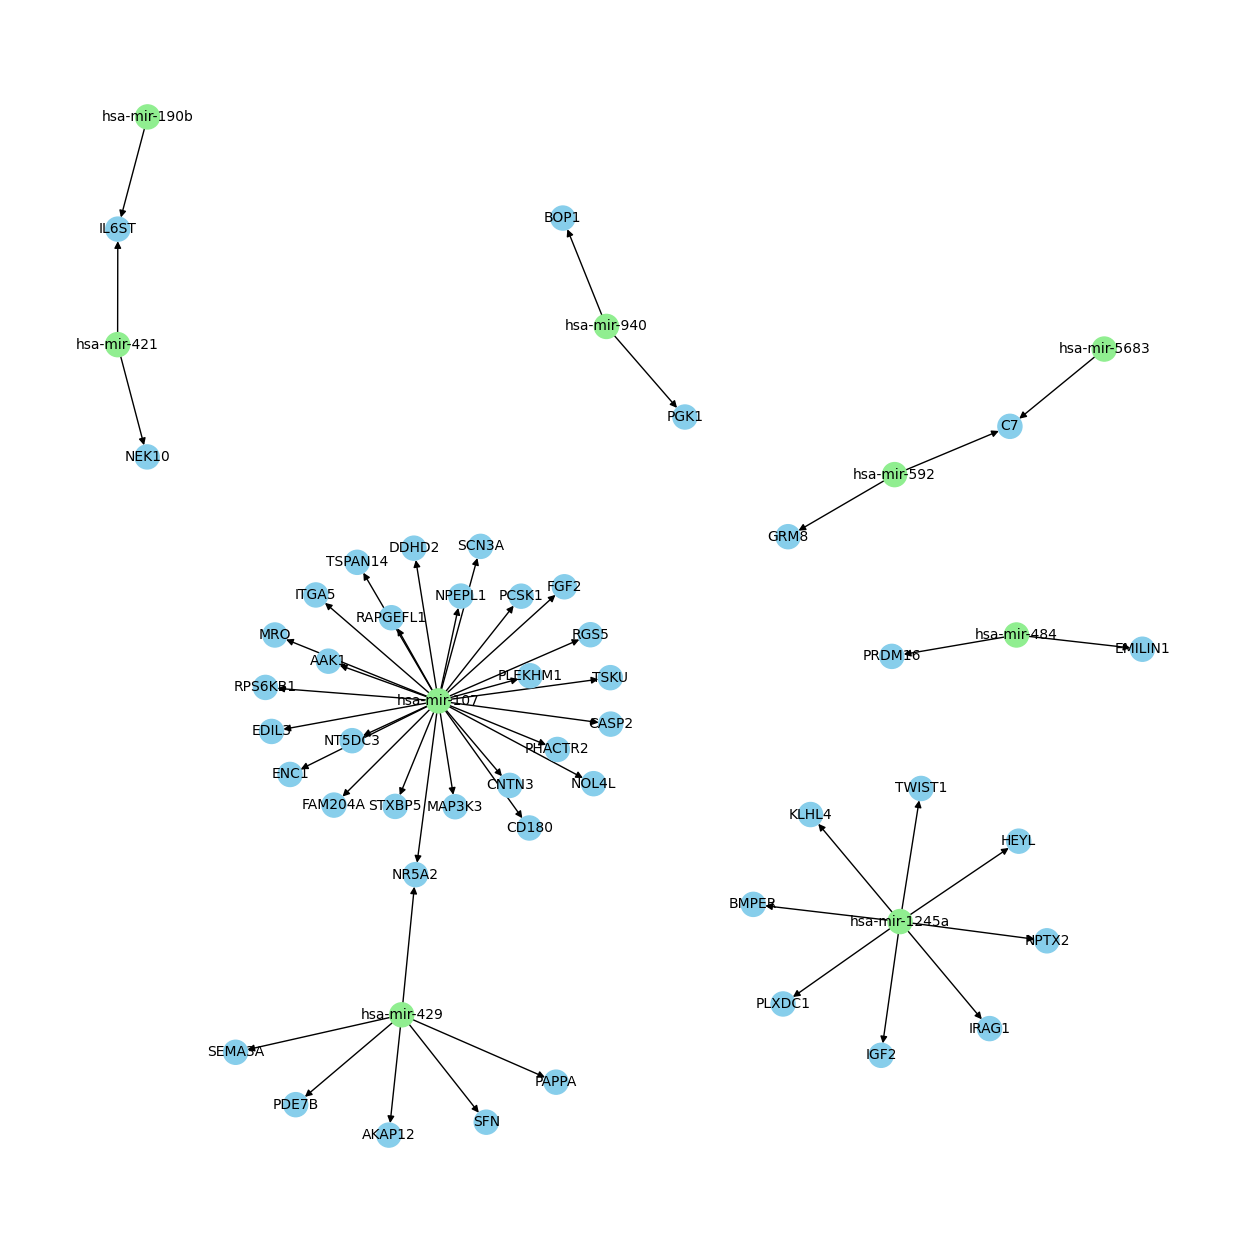

In [ ]:
# Example of model fitting with the TCGA BRCA dataset.

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv(f'../data/data_plos_brca.csv', sep = ',', index_col = 0)

X = data.drop('Class', axis = 1)

y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

mrnc = rnacorex.MRNC(n_con=50, precision = 20)

mrnc.fit(X_train, y_train)

In [ ]:
# Load the network.

mrnc.get_network()
mrnc.G_

In [ ]:
# For visualizing options pygraphviz is required. Install it with next command (conda-forge).

# conda install -y -c conda-forge pygraphviz

In [ ]:
# Visualize the network.

mrnc.get_network(display=True)

In [ ]:
# Get the connections of the model.

mrnc.connections_

In [ ]:
# Get the parameters of the model.

mrnc.clgc_['beta']
mrnc.clgc_['sigma']

In [ ]:
# Predict the test set.

mrnc.predict(X_test)

In [ ]:
# Example of model fitting with the TCGA BRCA dataset using fit_only.

mrnc2 = rnacorex.MRNC(precision = 20)
mrnc2.initialize_model(X_train, y_train)
mrnc2.compute_functional()
mrnc2.rank()
mrnc2.fit_only()